In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import jax.numpy as jnp
import os

In [2]:
# Iterate over all files in the directory
traces = {}              
for file in os.listdir('traces/'):
    trace = az.from_netcdf(f'traces/{file}')
    traces[f"{file.split('.')[0]}"] = trace     

FileNotFoundError: [Errno 2] No such file or directory: 'traces/'

In [120]:
az.compare(traces)

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
M10-M9+age,0,-52135.417146,57.254769,0.000000,0.789291,68.947676,0.000000,False,log
M9-M8+firm_size,1,-52136.171637,56.264915,0.754491,0.148500,68.874528,2.203587,False,log
M8-M7+self_emp,2,-52164.546694,54.153007,29.129548,0.000000,67.996432,6.765887,False,log
M7-M6+public_sector,3,-52168.057900,52.752671,32.640755,0.000000,68.063256,7.920723,False,log
M6-M5+part_time,4,-52184.086889,52.152141,48.669744,0.000000,67.633092,9.251649,False,log
M5-M4+union,5,-52462.724940,48.230771,327.307795,0.038441,64.462787,28.614119,False,log
M4-M3+tenure,6,-52499.469624,47.454784,364.052478,0.000000,63.911654,29.742870,False,log
M3-M2+grad_refyear,7,-52575.459389,45.789914,440.042243,0.000000,63.007794,31.556018,False,log
M2-M1+edu_level,8,-52630.739265,41.421287,495.322120,0.000000,62.593678,32.807585,False,log
M1-M0+sex,9,-52735.647822,39.010396,600.230677,0.000000,62.001585,34.704021,False,log


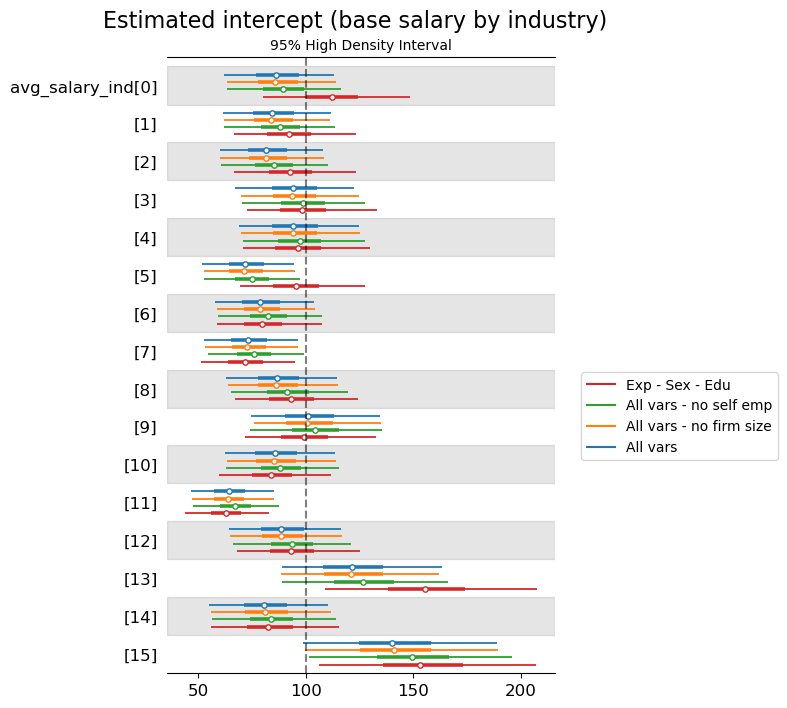

In [209]:
models = [traces['M10-M9+age'], traces['M9-M8+firm_size'], traces['M8-M7+self_emp'], traces['M2-M1+edu_level']]
axes = az.plot_forest(models, combined=True, legend=True, #combine_dims={"avg_salary_ind_dim_0","avg_salary_occ_dim_0"},
                      model_names=["All vars","All vars - no firm size","All vars - no self emp","Exp - Sex - Edu"],
                            figsize=(5, 8), var_names=["avg_salary_ind"], filter_vars="like", textsize=12)

legend = axes[0].get_legend()
legend.set_bbox_to_anchor((1.05, 0.5))

# Add a title
plt.suptitle('Estimated intercept (base salary by industry)', fontsize=16, x=0.5, y=0.94);
axes[0].set_title('95% High Density Interval', fontsize=10);

# Add a vertical line at 0
axes[0].axvline(100, color='k', linestyle='--', alpha=0.5);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


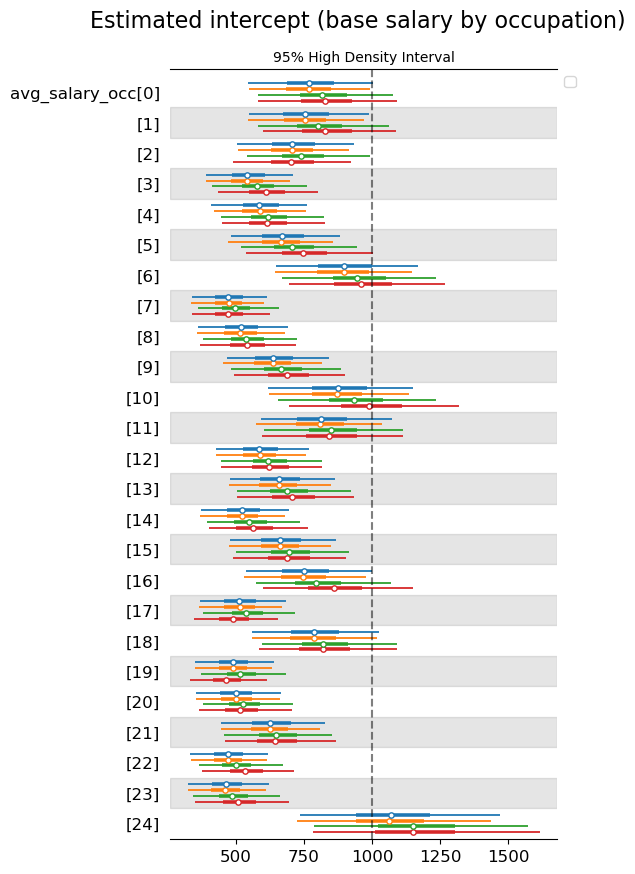

In [210]:
models = [traces['M10-M9+age'], traces['M9-M8+firm_size'], traces['M8-M7+self_emp'], traces['M2-M1+edu_level']]
axes = az.plot_forest(models, combined=True,legend=True, #combine_dims={"avg_salary_ind_dim_0","avg_salary_occ_dim_0"},
                      model_names=["All vars","All vars - no firm size","All vars - no self emp","Exp - Sex - Edu"],
                            figsize=(5, 10), var_names=["avg_salary_occ"], filter_vars="like", textsize=12)

# Locate legend outside the plot
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1));

# Add a title
plt.suptitle('Estimated intercept (base salary by occupation)', fontsize=16, x=0.5, y=0.94);
axes[0].set_title('95% High Density Interval', fontsize=10);

# Add a vertical line at 0
axes[0].axvline(1000, color='k', linestyle='--', alpha=0.5);

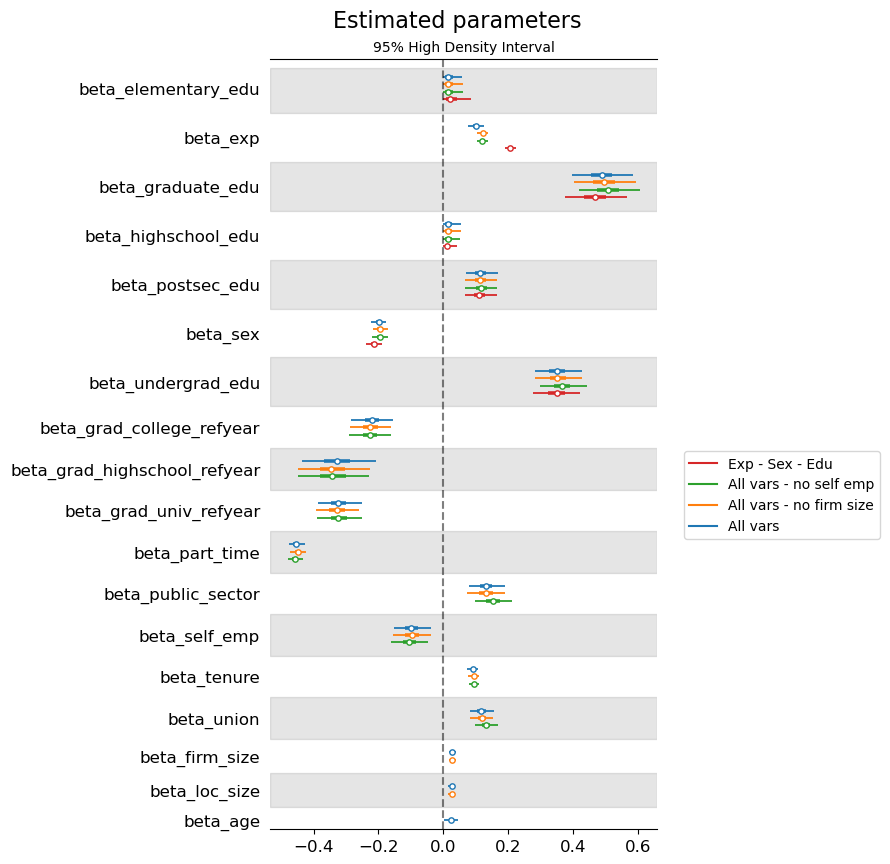

In [185]:
axes = az.plot_forest(models, combined=True, combine_dims={"avg_salary_ind_dim_0","avg_salary_occ_dim_0"},
                    model_names=["All vars","All vars - no firm size","All vars - no self emp","Exp - Sex - Edu"],
                            figsize=(5, 10), var_names=["~avg_salary_ind","~avg_salary_occ","~shape"], filter_vars="like", textsize=12)

legend = axes[0].get_legend()
legend.set_bbox_to_anchor((1.05, 0.5))

# Add a title
plt.suptitle('Estimated parameters', fontsize=16, x=0.5, y=0.93);
axes[0].set_title('95% High Density Interval', fontsize=10);

# Add a vertical line at 0
axes[0].axvline(0, color='k', linestyle='--', alpha=0.5);

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import jax.numpy as jnp
import os

In [12]:
trace = az.from_netcdf('../outputs/mixed_model_ind/2011/trace.nc')
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

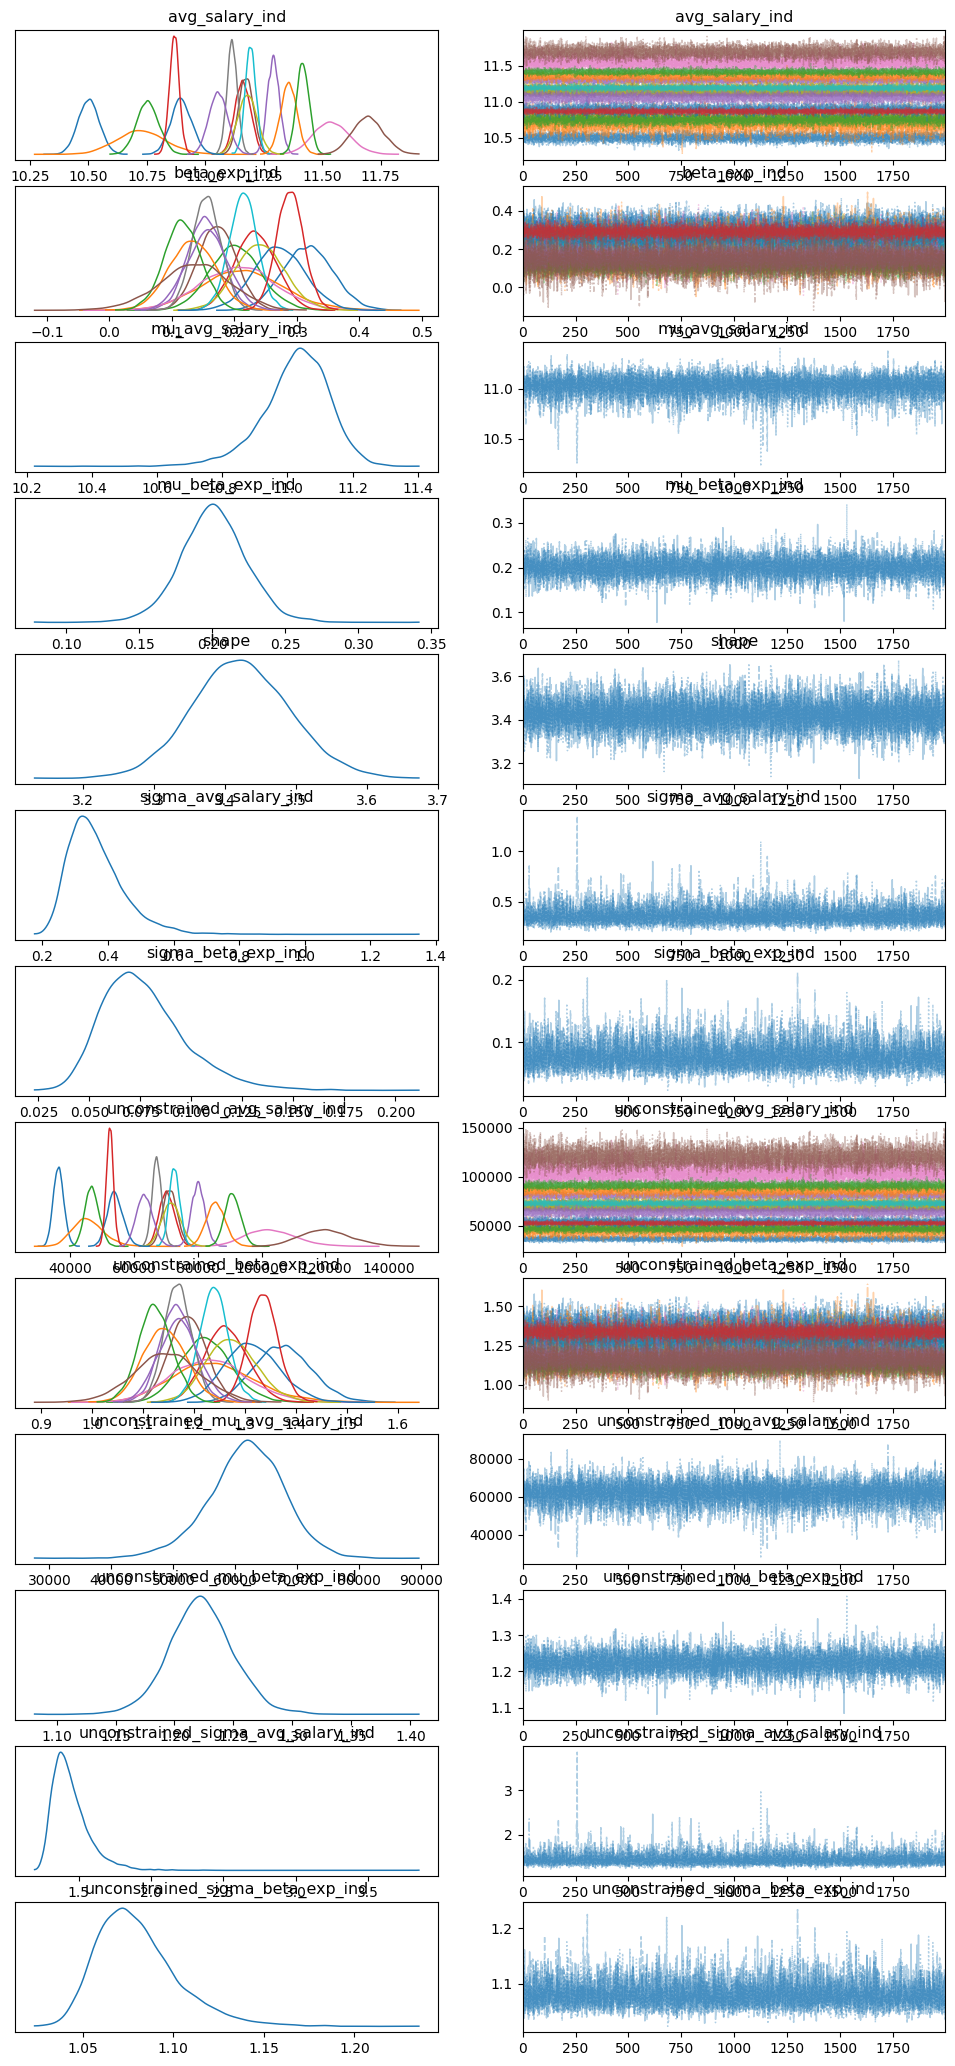

In [13]:
az.plot_trace(trace, combined=True);

In [15]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [18]:
az.waic(trace)

/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 8000 posterior samples and 4515 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -53348.45    60.13
p_waic       29.05        -

There has been a warning during the calculation. Please check the results.

In [9]:
az.loo(trace, pointwise=True)

Computed from 4000 posterior samples and 4515 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -52827.12    61.99
p_loo       56.32        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     4515  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%